<a href="https://colab.research.google.com/github/Anjan-AI/TSAI-EVA5/blob/master/Session%2010%20-%20Advanced%20Concepts%20in%20Training%20%26%20Learning%20Rates/EVA5_Session_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Added the modular files to the drive and added to path

In [4]:
%rm -rf TSAI-EVA5/
!git clone https://github.com/Anjan-AI/TSAI-EVA5.git

Cloning into 'TSAI-EVA5'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (358/358), done.
remote: Compressing objects: 100% (298/298), done.
remote: Total 553 (delta 144), reused 231 (delta 54), pack-reused 195
Receiving objects: 100% (553/553), 24.96 MiB | 35.26 MiB/s, done.
Resolving deltas: 100% (217/217), done.


In [5]:
import sys
sys.path.append('/content/TSAI-EVA5/Session 10 - Advanced Concepts in Training & Learning Rates/')
#sys.path.append('/content/TSAI-EVA5/Session 9 - DATA AUGMENTATION')

### Import all the Library

In [6]:
import torch
import os
import torchvision
import torchvision.transforms as transfroms
from Dataset.dataset import Dataset,cifar10_classes
from Dataset.image_augmentations import AlbumentationTransforms
from Utils.SetCuda import set_seed,initialize_cuda
from Utils.utilities import print_model_summary,cross_entropy_loss
from Utils.evaluate import show_misclassified_images,evaluate_classwise_accuracy
from Utils.GradCam import GradCamView
from Utils.show_image import imshow ,show_train_data
from models.resnet import ResNet18
from Training.Training_Testing import train ,test,runmodel

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [7]:
classes = cifar10_classes()
#define the transformation 
train_transform = AlbumentationTransforms(augmentation = True, mean=(0.4914, 0.4822, 0.4465) ,std_dev =(0.2471, 0.2435, 0.2616),horizontal_flip_prob=0.6,vertical_flip_prob=0.6,rotate_degree =30.0,cutout= True)
test_transform = AlbumentationTransforms(augmentation = True, mean=(0.4914, 0.4822, 0.4465) ,std_dev =(0.2471, 0.2435, 0.2616))
# allocate the transfroamtions to the the Data class
Data = Dataset(train_transform, test_transform)
# downlaod the data
train_set = Data.download_cifar10dataset(train = True)
test_set = Data.download_cifar10dataset(train = False)

#check for the GUP avaliblbity and manual seeding
seed =1
cuda,device = initialize_cuda(seed)

Files already downloaded and verified
Files already downloaded and verified
GPU Available? True


In [8]:
# Load the test and train data , set the batch size & Num_workeres.
train_loader = Data.data_loader(train_set,cuda= cuda ,batch_size = 64 , num_workers = 4 )
test_loader = Data.data_loader(test_set,cuda= cuda ,batch_size = 64 , num_workers = 4 )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

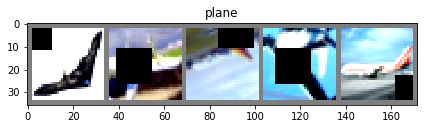

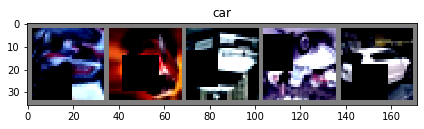

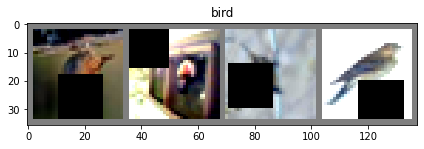

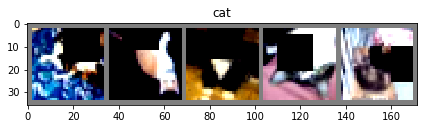

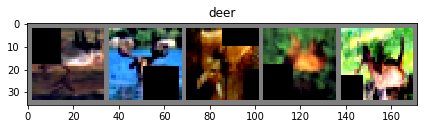

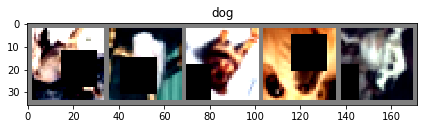

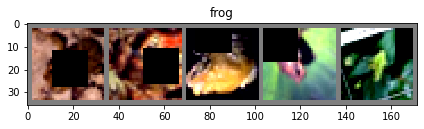

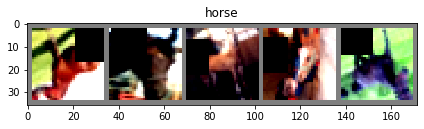

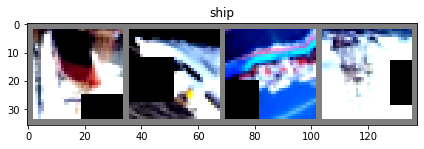

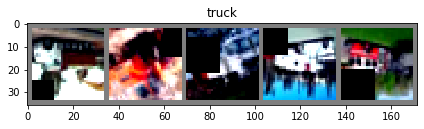

In [9]:
show_train_data(train_loader, classes)

In [10]:
# laod the model and print teh summary
model = ResNet18()
print_model_summary(model, input_size = (3,32,32),device =device)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [11]:
EPOCHS = 1 # set the no of epcohs

criterion = cross_entropy_loss()  # Create loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #define optimzer
scheduler = StepLR(optimizer, step_size=40, gamma=0.1) # define scheduler
train_losses = []
test_losses = []
train_acc = []
test_acc = []
print(device)
model = model.to(device)
runmodel(model,device,train_loader,test_loader,optimizer,scheduler,EPOCHS,criterion, train_losses,train_acc,test_losses,test_acc)



  0%|          | 0/782 [00:00<?, ?it/s]

cuda
EPOCH: 0


Loss=1.2083231210708618 Batch_id=781 Accuracy=37.45: 100%|██████████| 782/782 [00:32<00:00, 24.38it/s]



Test set: Average loss: 0.0222, Accuracy: 4847/10000 (48.47%)



In [12]:
evaluate_classwise_accuracy(model, device, classes, test_loader)

Accuracy of plane : 44 %
Accuracy of   car : 69 %
Accuracy of  bird : 29 %
Accuracy of   cat : 10 %
Accuracy of  deer : 30 %
Accuracy of   dog : 36 %
Accuracy of  frog : 70 %
Accuracy of horse : 71 %
Accuracy of  ship : 51 %
Accuracy of truck : 69 %


## Gradcam view of missclassfied Images 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or 

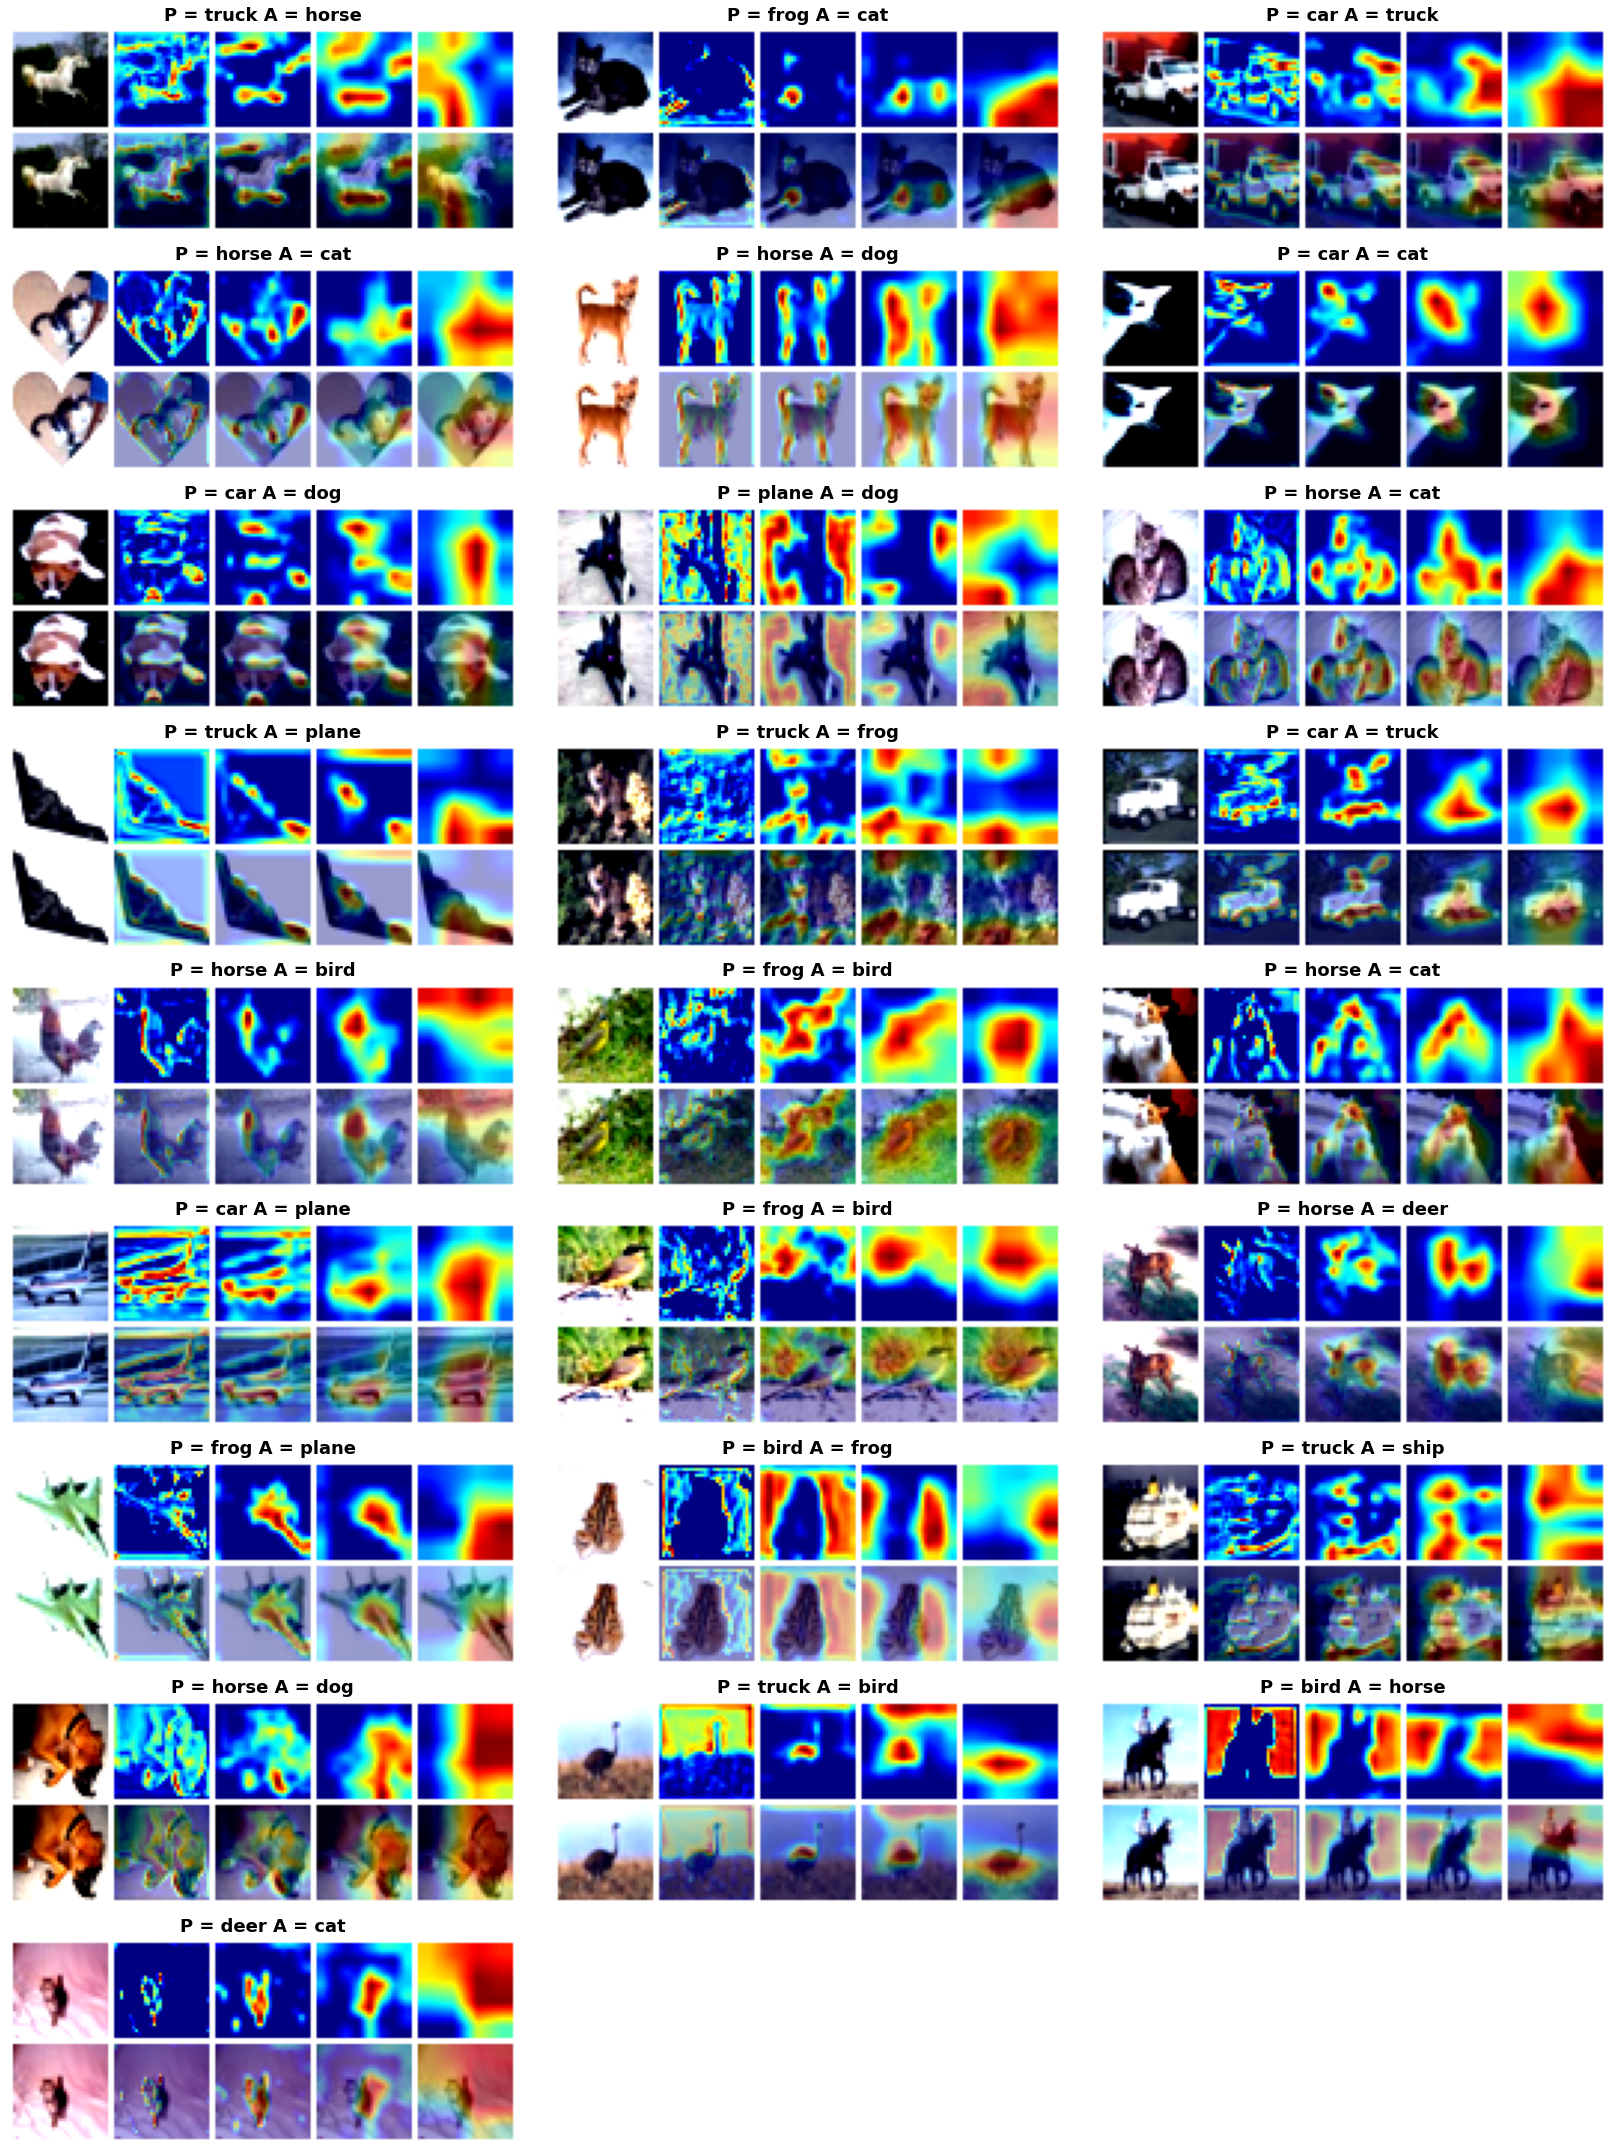

In [18]:
miscalssified_images = show_misclassified_images(model,device,test_loader,classes)
layers = [model.layer1,model.layer2,model.layer3,model.layer4]
GradCamView(miscalssified_images,model,classes,layers)